# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**FABIAN BRIJLAL**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [72]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 0

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [73]:
# loaded both the training and testing data here
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [74]:
# look at data statistics
df_train.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [75]:
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D852E0A220>,
      dtype=object)

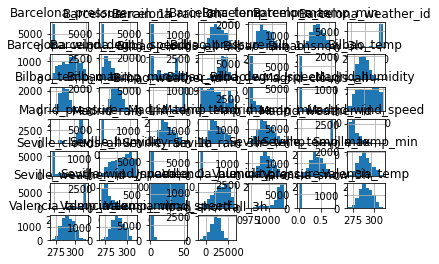

In [76]:
# plot feature interactions, just want to see how distributions look, size not important for now
features = df_train.columns
df_train[features].hist()

In [77]:
# evaluate correlation
df_train.corr()['load_shortfall_3h'].sort_values(ascending=False)

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Barcelona_temp_min      0.195984
Unnamed: 0              0.192612
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Valencia_pressure       0.086022
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rain_1h         -0.027159
Seville_rain_1h        -0.031572
Bilbao_snow_3h         -0.031721
Seville_ra

In [78]:
df_train.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [79]:
# find missing values
df_train.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [80]:
# remove missing values
df_train['Valencia_pressure']=df_train['Valencia_pressure'].fillna(df_train['Valencia_pressure'].mode())

In [81]:
# create new features
df_train['time'] = pd.to_datetime(df_train['time'], format='%Y-%m-%d %H:%M:%S')

In [82]:
# engineer existing features
df_train['year']=df_train['time'].dt.year
df_train['month']=df_train['time'].dt.month
df_train['day']=df_train['time'].dt.day
df_train['hour']=df_train['time'].dt.hour
df_train['minute']=df_train['time'].dt.minute

In [83]:
# remove unneccessary features
removable = ['time', 'Unnamed: 0','Seville_pressure','Valencia_wind_deg', 'Valencia_pressure']
df_train=df_train.drop(removable, axis=1)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [84]:
# create targets and features dataset
X = df_train.drop('load_shortfall_3h',axis=1)
Y = df_train['load_shortfall_3h']

In [85]:
# split data
x_train,X_test,y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=PARAMETER_CONSTANT)

In [86]:
# create one or more ML models
myrf = RandomForestRegressor(n_estimators=100, random_state=PARAMETER_CONSTANT, max_depth=74)
mylm = LinearRegression()

In [87]:
# evaluate one or more ML models
myrf.fit(x_train,y_train)

RandomForestRegressor(max_depth=74, random_state=0)

In [88]:
mylm.fit(x_train,y_train)

LinearRegression()

In [89]:
# called predict function on my random forest
gen_y = myrf.predict(X_test)

In [90]:
# called predict function on my linear regression
gen_lmy = mylm.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [91]:
# Compare model performance
print("RMSE for Randomn Forest model:",np.sqrt(mean_squared_error(Y_test,gen_y)))

RMSE for Randomn Forest model: 3097.2291630584145


In [92]:
print('R_squared for Random Forest model:', r2_score(Y_test, gen_y))

R_squared for Random Forest model: 0.6524324299759019


In [93]:
print("RMSE for Linear Regression model:",np.sqrt(mean_squared_error(Y_test,gen_lmy)))

RMSE for Linear Regression model: 4820.650922706824


In [94]:
print('R_squared for Linear Regression model:', r2_score(Y_test, gen_lmy))

R_squared for Linear Regression model: 0.15801581142142074


Based on our two models, Clearly the RMSE for the Random Forest model is lower than the RMSE 
for the Linear Regression models. This means the Random Forest model out performs the 
Linear Regression model with testing our unseen 20% data. While R squared measures how fit
the line is to the data, RMSE measures the predictive accuracy of the model.
I have decided to now test it out on the unseen testing data stored in df_test

In [95]:
#creating a new variable called submissions and storing column time
submissions = df_test[['time']]

In [96]:
#cleaning the df_test data in the exact way as I had cleaned the df_trained data
df_test['Valencia_pressure']=df_test['Valencia_pressure'].fillna(df_test['Valencia_pressure'].mode())

In [97]:
df_test['time'] = pd.to_datetime(df_test['time'], format='%Y-%m-%d %H:%M:%S')

In [98]:
df_test['year']=df_test['time'].dt.year
df_test['month']=df_test['time'].dt.month
df_test['day']=df_test['time'].dt.day
df_test['hour']=df_test['time'].dt.hour
df_test['minute']=df_test['time'].dt.minute

In [99]:
removable = ['time', 'Unnamed: 0','Seville_pressure','Valencia_wind_deg', 'Valencia_pressure']
df_test=df_test.drop(removable, axis=1)

In [100]:
# using Random Forest model to predict on unseen df_test data, saved in a variable predictions
predictions = myrf.predict(df_test)

In [101]:
submissions['load_shortfall_3h'] = predictions

In [102]:
# turned submissions into a csv file
submissions.to_csv('submissions_load_shortfall_3h.csv', index=None)

When submitting the new csv file on Kaggle, the RMSE is given as 3864.10897. This is
not far from our previous RMSE of 3097.2291630584145, this indicates a good predictive accuracy

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

# discuss chosen methods logic
The name of our best performing model is called Random Forests. Let me explain how it works. You can
think of it as an actual forest! and what makes up a forest? Trees! and a whole bunch of them. So Random forests are just a bunch of trees. But these trees are special trees called Decision trees. Decision trees as the name implies, makes decisions about the data. So just to recap, we have a forest made out of special trees called Decision trees. 

So these Decision trees make decisions about something in a way in which the answer is either true or false. For example, say we have a variable called age that is equal to 15. If we had to use a Decision tree to find out what Age is equal to, the Decision Tree would ask itself something like "is Age less than 15". The answer is false. The key thing to remember about Decisions trees is that it keeps asking itself questions like this recursively,meaning it will then ask itself is Age greater than 15? and On and on it will go until it reaches one of its terminal nodes. A terminal node is a node that is at the end, there is nothing that comes after it.

So a Decision tree starts at its top which is what we call a root node. It will then go down until it reaches a split which is what we call a branch. At each branch is where the Decision tree will make a decision. Based on the Decision it makes, it will take either path in a branch. That is how only one Decision Tree works. But because Random Forest is a bunch of Decision Trees, this process happens at each Decision tree!

Random Forests are also affected by their parameters. A parameter basically is like a constraint you give the Random Forest so it will know how far it can go or from where it should start. The important parameters of a Random Forest are n_estimators, max_depth and random_state. There are many other parameters but we will focus on these three.

n_estimators is the number of Decision trees you want to have in your Random Forest. by default it is 100. max_depth is in simple terms the number of nodes you want to have between the root node and the leaf node. random_state is used to seed the random number generator. This ensures we get the same trees and output each time we fit our model with the data.